In [1]:
import cv2 
import numpy as np 
import pandas as pd
import easyocr 

In [2]:
reader = easyocr.Reader(['en'], gpu=True) # the reader that will evaluate through the license plate text. 

In [3]:
detections = reader.readtext("/home/jik19004/FilesToRun/DINGRESEARCH/5717Proj/LP-Dataset/LP-characters/images/0000.png")

In [4]:
df = pd.read_csv("/home/jik19004/FilesToRun/DINGRESEARCH/5717Proj/parsedLP_Plates.csv")
df.drop("Unnamed: 0", axis = 1, inplace= True)
display(df)

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,MH15TC554,0000.xml,M,13-17-27-32,H,25-16-38-33,1,36-16-46-34,5,45-16-55-33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MH02CB4545,0001.xml,M,15-23-32-41,H,33-26-46-44,0,51-29-64-47,2,63-32-77-50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,KA031351,0003.xml,K,19-11-30-29,A,31-13-40-29,0,40-13-52-30,3,51-15-62-30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TN0600000,0004.xml,T,156-27-228-156,N,248-31-322-159,0,362-32-435-159,6,456-38-526-161,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KA51MJ8156,0005.xml,K,22-13-33-34,A,34-13-45-34,5,45-12-58-34,1,59-14-69-34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,MH2OBN3525,0232.xml,M,25-25-40-45,H,42-25-56-45,2,59-25-71-45,O,71-25-88-45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204,MH01AR5274,0233.xml,M,21-19-31-29,H,30-19-39-28,0,43-20-51-28,1,50-19-57-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
205,MH20CS1941,0234.xml,M,18-18-31-35,H,32-18-42-35,2,43-19-54-34,0,54-18-64-34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,H20CS1938,0235.xml,H,21-15-27-26,2,27-16-32-26,0,32-17-37-27,C,37-16-43-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
TrainingPartition = int(len(df) * 0.4) - 1 
ValidationPartition = int(len(df) * 0.7) - 1 
print("index of Training Partition is:", TrainingPartition) 
print("index of Valiadtion Partition is:", ValidationPartition) 

index of Training Partition is: 82
index of Valiadtion Partition is: 144


In [6]:
from torchmetrics.text import CharErrorRate
import os 

ImageFiles = [os.path.join('/home/jik19004/FilesToRun/DINGRESEARCH/5717Proj/LP-Dataset/LP-characters/images', file)
                   for file in os.listdir('/home/jik19004/FilesToRun/DINGRESEARCH/5717Proj/LP-Dataset/LP-characters/images')] # get the file content. TestingDataList = ImageFiles[144:]
ImageFiles = sorted(ImageFiles)
TestingDataList = ImageFiles[144:]
print(TestingDataList)

2024-04-15 18:10:40.725565: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-15 18:10:40.727438: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-15 18:10:40.753285: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-15 18:10:40.753304: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-15 18:10:40.754063: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

['/home/jik19004/FilesToRun/DINGRESEARCH/5717Proj/LP-Dataset/LP-characters/images/0163.png', '/home/jik19004/FilesToRun/DINGRESEARCH/5717Proj/LP-Dataset/LP-characters/images/0164.png', '/home/jik19004/FilesToRun/DINGRESEARCH/5717Proj/LP-Dataset/LP-characters/images/0167.png', '/home/jik19004/FilesToRun/DINGRESEARCH/5717Proj/LP-Dataset/LP-characters/images/0168.png', '/home/jik19004/FilesToRun/DINGRESEARCH/5717Proj/LP-Dataset/LP-characters/images/0169.png', '/home/jik19004/FilesToRun/DINGRESEARCH/5717Proj/LP-Dataset/LP-characters/images/0170.png', '/home/jik19004/FilesToRun/DINGRESEARCH/5717Proj/LP-Dataset/LP-characters/images/0171.png', '/home/jik19004/FilesToRun/DINGRESEARCH/5717Proj/LP-Dataset/LP-characters/images/0172.png', '/home/jik19004/FilesToRun/DINGRESEARCH/5717Proj/LP-Dataset/LP-characters/images/0173.png', '/home/jik19004/FilesToRun/DINGRESEARCH/5717Proj/LP-Dataset/LP-characters/images/0174.png', '/home/jik19004/FilesToRun/DINGRESEARCH/5717Proj/LP-Dataset/LP-characters/image

In [7]:
pred = reader.readtext("/home/jik19004/FilesToRun/DINGRESEARCH/5717Proj/LP-Dataset/LP-characters/images/0167.png")
print(len(pred))
for i in pred: 
    print(i[1])

5
0
MhIL
9239
IND
Cn


In [8]:
x= "aaa--dfs"
x.replace("-","")

'aaadfs'

In [11]:
## Concatenate each of the broken pieces together as a whole. 
## Evaluate using Character Error Rate, (CER) with predictions and actual testing output. 
def Predictions(): 
    PredictionsList = [] 
    for i in TestingDataList:
        x = reader.readtext(i)
        char = ""
        if len(x) == 1: 
            char = x[0][1]
            char = char.upper()
            char = char.replace("-","")
            char = char.replace(" ","")
        else:
            for j in x:
                char+= j[1]
                char = char.upper()
                char = char.replace("-","")
                char = char.replace(" ","")
        PredictionsList.append(char)
    return PredictionsList

In [12]:
PList = Predictions()
print(PList)

['HR2GDKO830', 'HR26CT6702', '0MHIL9239INDCN', 'FHR260G6167', 'NN6IOZBRMDD|', 'NUMERIXEUROKL38F50083_._', 'FLUSSH', '"KLOIBR8055', 'KLO1CA2555', 'KL0LCC50_', 'KA011330', 'KA@6989', '017887666', 'MII2OBN3525', "MH:'01AR5274", 'YMH20EE7598', 'MHZODJ0419', 'MH20EE0943', 'MH20DV2362', 'MH2OCS4946', 'KL12G753', 'KL7BZ99', 'IN45BA1065]', 'KL54H369', 'KL?53E964', 'MHOIND"812586]', '"KA03NA8385', 'MH14TCD204', 'MH14EH5819', 'MHI4EP4660', 'MH14DT8831', 'MH14TCF300', 'NHO1AV8866', '[N59A07515]', 'MH15TC554', "MH'206IANM14TC'", 'MH12JC2813', 'IN07BU5427', 'MHD3BS7778', 'MH14E43498', 'HHZOEE7597', '1N4268DL', 'FHH14EH7958', 'MH14ICF460', 'MIH:20EE45', 'TN38BW1139', 'TNZLAL5074', 'KLOAXEOOO', 'KLG0N5344', 'PBO8CX2959]', 'FKA292999]', 'KA19FR0212010*2011', 'MHZOBY3665', 'WP16IC1366|', 'HR26DA04711', 'HR26CR3302', 'HR26BP3543', 'HR26CT6702', 'MBONPZOD', 'MMHQ2OBN3525', 'MF0IAA5274', 'M#20CS1941', 'LH2OCS1938', 'HH14DT8831']


In [21]:
CSV_file = pd.read_csv("/home/jik19004/FilesToRun/DINGRESEARCH/5717Proj/parsedLP_Plates.csv")
Testing_CSV = CSV_file.iloc[144:, :]
Testing_CSV.drop("Unnamed: 0", inplace = True, axis = 1)
Testing_array = Testing_CSV.iloc[:, 0]
display(Testing_array)

/tmp/ipykernel_2670/2619812252.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Testing_CSV.drop("Unnamed: 0", inplace = True, axis = 1)


144    HR26DK0830
145    HR26CT6702
146    MH14GN9239
147    HR26DG6167
148    GJ07BR1336
          ...    
203    MH2OBN3525
204    MH01AR5274
205    MH20CS1941
206     H20CS1938
207    MH14DT8831
Name: 0, Length: 64, dtype: object

In [25]:
C_ER = CharErrorRate()
errorRate = C_ER(Testing_array, PList)
print("The accuracy is:", errorRate)

The accuracy is: tensor(0.2523)


In [26]:
actual = "asdf"
actual = list(actual)
print(actual)

['a', 's', 'd', 'f']


In [37]:
Testing_array = np.array(Testing_array)
PList = np.array(PList)

In [40]:
def ErrorRateList(Testing_array = Testing_array, PList = PList): 
    ListOfErrors = [] 
    for i in range(len(Testing_array)):
        Actual = Testing_array[i]
        Actual = list(Actual)
        Pred = PList[i]
        Pred = list(Pred)

        Actual_len = len(Actual)
        Pred_len = len(Pred)
    
        index = 0 
        error = 0 
        while index < Actual_len and index < Pred_len: 
            if Actual[index] != Pred[index]:
                error+=1 
            index +=1
        if abs(Actual_len - Pred_len) != 0: 
            error += (abs(Actual_len - Pred_len))
        ListOfErrors.append(error)
    return ListOfErrors

ListOfErrors = ErrorRateList()
print(ListOfErrors)    
            

[2, 0, 14, 11, 12, 24, 0, 10, 1, 2, 5, 9, 4, 10, 10, 10, 2, 0, 0, 1, 1, 0, 2, 0, 7, 12, 11, 0, 2, 1, 0, 0, 2, 4, 3, 14, 0, 5, 1, 1, 5, 8, 9, 1, 9, 0, 4, 8, 1, 2, 8, 11, 2, 3, 1, 0, 0, 0, 6, 10, 3, 1, 10, 1]


([<matplotlib.axis.XTick at 0x7efe3453e220>,
 [Text(0, 0, '0'),
  Text(2, 0, '2'),
  Text(4, 0, '4'),
  Text(6, 0, '6'),
  Text(8, 0, '8'),
  Text(10, 0, '10'),
  Text(12, 0, '12'),
  Text(14, 0, '14'),
  Text(16, 0, '16'),
  Text(18, 0, '18'),
  Text(20, 0, '20'),
  Text(22, 0, '22'),
  Text(24, 0, '24')])

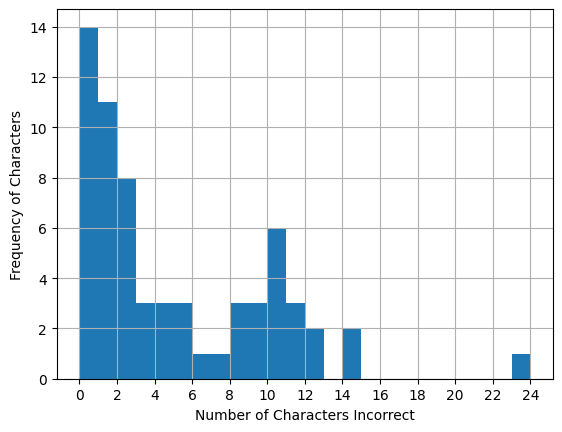

In [49]:
import matplotlib.pyplot as plt 

plt.hist(x = ListOfErrors, bins = range(min(ListOfErrors), max(ListOfErrors)+1))
plt.xlabel("Number of Characters Incorrect")
plt.ylabel("Frequency of Characters")

plt.grid()
plt.xticks(range(min(ListOfErrors), max(ListOfErrors)+1, 2))